In [1]:
import numpy as np
import pandas as pd 
from sklearn import preprocessing

In [2]:
data_change = pd.read_csv('ex14.csv',encoding='gbk',index_col=0)

In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data_change)

In [4]:
data

array([[1.        , 0.93782929, 0.        ],
       [0.4696449 , 0.8967334 , 0.00615729],
       [0.04467354, 0.7319986 , 0.18219983],
       [0.09278351, 0.89181595, 0.07276798],
       [0.10423826, 0.75939586, 0.18723762],
       [0.2325315 , 1.        , 0.00307865],
       [0.18098511, 0.7889006 , 0.05009796],
       [0.17983963, 0.86441869, 0.06073328],
       [0.68270332, 0.97435897, 0.06549118],
       [0.10309278, 0.79311556, 0.23873496],
       [0.06872852, 0.69863014, 0.24517212],
       [0.03550974, 0.56621005, 0.44024629],
       [0.07560137, 0.4573235 , 0.19395466],
       [0.04810997, 0.52651914, 0.21046739],
       [0.04696449, 0.74920969, 0.22865939],
       [0.03207331, 0.79733052, 0.20850826],
       [0.11454754, 0.67825782, 0.19843269],
       [0.0652921 , 0.65753425, 0.09515813],
       [0.0882016 , 0.67404285, 0.04897845],
       [0.02520046, 0.53705655, 0.05345648],
       [0.07674685, 0.65612926, 0.1474951 ],
       [0.04467354, 0.62521953, 0.21102715],
       [0.

In [5]:
data.shape

(30, 3)

In [6]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets

Text(0.5,1,'Best k')

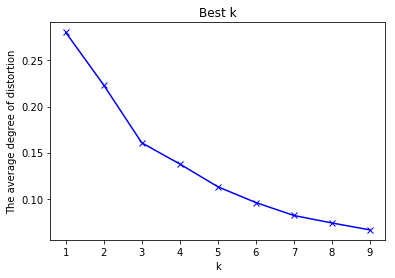

In [8]:
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    meandistortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('The average degree of distortion')
plt.title('Best k')

In [9]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(data)

In [10]:
labels = kmeans.predict(data)

In [11]:
data_change['label'] = labels

In [12]:
data_change

,DXBZ,CZBZ,WMBZ,label
北京,9.30,30.55,8.70,2
天津,4.67,29.38,8.92,2
河北,0.96,24.69,15.21,1
山西,1.38,29.24,11.30,1
内蒙古,1.48,25.47,15.39,1
辽宁,2.60,32.32,8.81,1
吉林,2.15,26.31,10.49,1
黑龙江,2.14,28.46,10.87,1
上海,6.53,31.59,11.04,2
江苏,1.47,26.43,17.23,1


#选择k等于5

In [13]:
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(labels[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

In [14]:
X = data_change.iloc[:,0:3]

In [15]:
X

,DXBZ,CZBZ,WMBZ
北京,9.30,30.55,8.70
天津,4.67,29.38,8.92
河北,0.96,24.69,15.21
山西,1.38,29.24,11.30
内蒙古,1.48,25.47,15.39
辽宁,2.60,32.32,8.81
吉林,2.15,26.31,10.49
黑龙江,2.14,28.46,10.87
上海,6.53,31.59,11.04
江苏,1.47,26.43,17.23


In [16]:
#降维
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

Computing embedding
Done.


D:\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


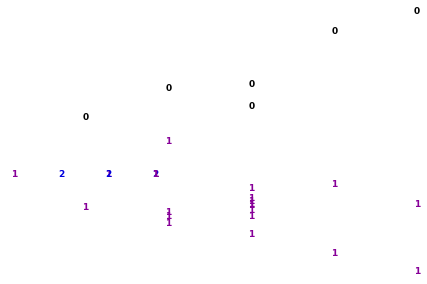

In [17]:
plot_clustering(X_red, X, kmeans.labels_)

In [18]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [19]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [20]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)